In [1]:
import gzip

import pandas as pd

pd.set_option("display.max_columns", None)

Read LOH positions

In [2]:
df = pd.read_csv("../intersect_mmml_onek1k_with_header.vcf.gz", sep="\t", compression="gzip", low_memory=False)
len(df)

18822150

In [3]:
df = df.drop(columns=["Unnamed: 29", "position_dummy", "#CHR", "POS", "POS_DUMMY"])

In [4]:
df["position_code"] = df["#CHROM"].astype(str) + "-" + df["pos"].astype(str)

In [5]:
df.head()

,#CHROM,pos,REF,ALT,INFO,sample_control,sample_tumor,start,end,genotype,TCN,PID,normal_genotype,tumor_genotype,quality_score,reads_normal,reads_tumor,CELL_TYPE,RSID,GENE,GENE_ID,A1,A2,A2_FREQ_ONEK1K,A2_FREQ_HRC,position_code
0,9,21448447,G,A,BRF=0.13;FR=0.5;HP=1;HapScore=2;MGOF=18;MMLQ=3...,"1/0:-38.46,0,-91.36:8:99:38:13","1/0:-32.21,0,-45.31:18:99:27:11",21341573,21731170,1:0,1.0,4100049,"1,1","1,0",22.796598,38,27,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs7864960,"{'PTPLAD2', 'RP11-70L8.4', 'RP11-408N14.1'}","{'ENSG00000188921', 'ENSG00000265194', 'ENSG00...",G,A,0.49054,0.493363,9-21448447
1,9,21456775,G,A,BRF=0.18;FR=0.5;HP=2;HapScore=1;MGOF=9;MMLQ=37...,"1/0:-69.42,0,-74.92:5:99:46:23","1/0:-9.51,0,-59.71:9:95:23:4",21341573,21731170,1:0,1.0,4100049,"1,1","1,0",68.389793,46,23,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs10491569,"{'PTPLAD2', 'RP11-70L8.4', 'RP11-408N14.1'}","{'ENSG00000188921', 'ENSG00000265194', 'ENSG00...",G,A,0.28734,0.273914,9-21456775
2,9,21471498,C,T,BRF=0.1;FR=0.5;HP=2;HapScore=2;MGOF=11;MMLQ=37...,"0/1:-71.26,0,-46.26:11:99:35:20","0/1:-17.58,0,-59.78:11:99:25:5",21341573,21731170,1:0,1.0,4100049,"1,1","1,0",68.389793,35,25,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs1412395,"{'PTPLAD2', 'RP11-70L8.4', 'RP11-408N14.1'}","{'ENSG00000188921', 'ENSG00000265194', 'ENSG00...",C,T,0.60961,0.612796,9-21471498
3,9,21471725,C,T,BRF=0.17;FR=0.5;HP=1;HapScore=2;MGOF=12;MMLQ=4...,"0/1:-72.59,0,-64.49:7:99:42:22","0/1:-10.98,0,-55.68:12:99:24:6",21341573,21731170,1:0,1.0,4100049,"1,1","1,0",54.711835,42,24,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs2383192,"{'PTPLAD2', 'RP11-70L8.4', 'RP11-408N14.1'}","{'ENSG00000188921', 'ENSG00000265194', 'ENSG00...",C,T,0.53553,0.531583,9-21471725
4,9,21473816,A,G,BRF=0.14;FR=0.3913;HP=4;HapScore=1;MGOF=12;MML...,"0/1:-85.27,0,-104.07:12:99:63:28","0/1:-0.31,0,-95.51:3:5:29:2",21341573,21731170,1:0,1.0,4100049,"1,1","1,0",99.000000,63,29,"Naïve/Immature B Cell,Memory B Cell,CD4 Effect...",rs10965014,"{'PTPLAD2', 'RP11-70L8.4', 'RP11-408N14.1'}","{'ENSG00000188921', 'ENSG00000265194', 'ENSG00...",A,G,0.61050,0.604250,9-21473816


Analyse LOH positions

In [6]:
no_distinct_positions = df["position_code"].nunique()
no_distinct_positions

4106598

In [7]:
df["#CHROM"].nunique()

22

In [8]:
no_distinct_patients = df["PID"].nunique()
no_distinct_patients

235

In [9]:
unique_combinations = len(df.drop_duplicates(['PID','position_code']).index)
unique_combinations

18822150

Merge position count

In [10]:
ser = pd.read_json("../intersect_position_count.json", typ="series", dtype={str})
df_position_count = ser.to_frame("position_count")
df_position_count = df_position_count.reset_index(names="pos")
df_position_count.shape

(4106598, 2)

In [11]:
df_position_count.head()

,pos,position_count
0,9-21448447,12
1,9-21456775,14
2,9-21471498,15
3,9-21471725,17
4,9-21473816,14


In [12]:
df = df.merge(df_position_count, how="inner", left_on="position_code", right_on="pos")
len(df)

18822150

Set threshold

In [13]:
threshold = 10
df_thresholded = df[df["position_count"] >= threshold]
len(df_thresholded)

7387082

Analyze thresholded dataframe

In [26]:
df_thresholded["PID"].nunique()

107

In [27]:
df_thresholded["#CHROM"].nunique()

2

In [28]:
df_thresholded["#CHROM"].unique()

array([1, 6])

In [29]:
df_thresholded["position_code"].nunique()

324

Write to csv

In [30]:
df_thresholded.to_csv(f"../LOH_pos_thresholded/LOH_positions_threshold_{threshold}.tsv.gz", sep="\t", header=True, index=False, compression="gzip")

Own analysis

In [51]:
def splitline_chrom(string):
    return string.split('-')[0]
def splitline_pos(string):
    return string.split('-')[1]
def create_fake_p_value(value):
    return 2/(value)

In [26]:
df_position_count['#CHROM']=df_position_count['pos'].apply(splitline_chrom)
df_position_count['POS']=df_position_count['pos'].apply(splitline_pos)
df_position_count.drop('pos',axis=1, inplace=True)
df_position_count

,position_count,#CHROM,POS
0,12,9,21448447
1,14,9,21456775
2,15,9,21471498
3,17,9,21471725
4,14,9,21473816
...,...,...,...
4106593,1,16,90103450
4106594,1,16,90103658
4106595,1,16,90105045
4106596,1,16,90106745


In [27]:
df_position_count.sort_values('position_count', ascending=False).head(20)

,position_count,#CHROM,POS
5927,49,1,4839047
5878,48,1,4813073
5877,48,1,4813070
5869,48,1,4808453
5879,47,1,4813114
6468,46,1,5678782
404613,46,1,4844375
5854,45,1,4802512
404049,45,1,3741210
404620,45,1,4850822


In [52]:
df_manhattan=df_position_count
df_manhattan["#CHROM"] = df_manhattan["#CHROM"].astype(int)
df_manhattan["POS"] = df_manhattan["POS"].astype(int)
df_manhattan = df_manhattan.sort_values(by=["#CHROM", "POS"])
df_manhattan['P'] = df_manhattan['position_count'].apply(create_fake_p_value)

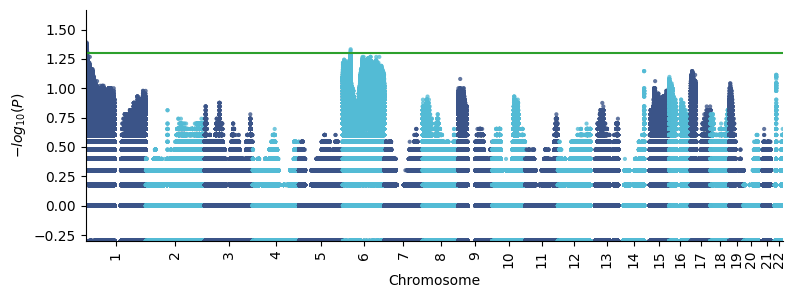

In [53]:
from qmplot import manhattanplot
ax = manhattanplot(
    data=df_manhattan,
    genomewideline=0.05,
    xticklabel_kws={"rotation": "vertical"})

In [58]:
df_LOH_20 = df_manhattan[df_manhattan['position_count']>20].sort_values('position_count', ascending=False)
df_LOH_20

,position_count,#CHROM,POS,P
5927,49,1,4839047,0.040816
5869,48,1,4808453,0.041667
5878,48,1,4813073,0.041667
5877,48,1,4813070,0.041667
5879,47,1,4813114,0.042553
...,...,...,...,...
952521,21,6,122312809,0.095238
952519,21,6,122312756,0.095238
952518,21,6,122312433,0.095238
952516,21,6,122312050,0.095238


In [61]:
df_LOH_20[df_LOH_20['#CHROM']=='14']

,position_count,#CHROM,POS,P
630172,28,14,106748942,0.071429
630171,28,14,106748868,0.071429
630170,28,14,106748015,0.071429
